## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

### 교과목명 : 모델성능평가
- 평가일 : 22.9.19
- 성명 : 박혜린
- 점수 : 75

Q1. iris data를 불러와서 붓꽃의 종류를 분류하는 모델링을 수행한 후 오차행렬과 정확도를 평가하세요.
- test_size = 0.2, 분류기는 DecisionTreeClassifier를 이용

In [84]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

In [82]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,test_size=0.2, random_state=10)
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)

print('오차행렬: \n',confusion_matrix(y_test,pred))
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

오차행렬: 
 [[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
예측 정확도: 0.9333


In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=10)
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)


confusion = confusion_matrix(y_test,pred)
accuracy = accuracy_score(y_test,pred)

print(confusion)
print(accuracy)


[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
0.9666666666666667


Q2. 타이타닉 분석용 데이터세트인 tdf1.pkl를 불러와서 생존자 예측 모델을 만든 후 오차행렬, 정확도, 재현율, f1, AUC를 포함하는 사용자 함수를 활용하여 평가하세요.
- test_size = 0.2, 분류기는 RandomForestClassifier 이용

In [9]:
import pandas as pd
tdf = pd.read_pickle('tdf1.pkl')
tdf.head()

,Survived,Sex,Town_0,Town_1,Town_2,Family_Big,Family_Single,Family_Small,Age_10s,Age_20s,Age_30s,Age_40s,Age_50s,Age_Elderly,Fare_cat
0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,4
2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,4
4,0,1,0,0,1,0,1,0,0,0,0,1,0,0,2


In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율: {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [93]:
from sklearn.ensemble import RandomForestClassifier

X = tdf.drop('Survived', axis=1)
y = tdf['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=10)
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,rf_pred, rf_pred_proba)

오차행렬
[[103  14]
 [ 14  48]]
정확도 : 0.8436, 정밀도 : 0.7742, 재현율: 0.7742, F1 : 0.7742, AUC : 0.8763


Q3. Q2에서 생성한 모델로 교차검증(cv=5)을 수행하고 평균 정확도를 출력하세요.

In [94]:
import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_clf, X, y, scoring='accuracy', cv=5)
print('정확도 : ', np.round(scores,4))
print('평균 정확도 : ',round(np.mean(scores),4))

정확도 :  [0.7933 0.8034 0.7809 0.7584 0.8258]
평균 정확도 :  0.7924


Q4. Q2에서 생성한 예측모델에 대하여 교차 검증 및 성능 개선을 수행하세요.(GridSearchCV 활용)

In [95]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[50,100,200],
         'max_depth':[2,4,6,8,10],
         'min_samples_leaf':[2,8,14,20],
         'min_samples_split':[2,8,14,20]}
rf_dclf = GridSearchCV(rf_clf, param_grid = params, cv=5, refit=True)
rf_dclf.fit(X_train,y_train)
print(rf_dclf)
print('최적 하이퍼 파라미터 : ',rf_dclf.best_params_)
print('최고 정확도 : ', rf_dclf.best_score_)
best_rclf = rf_dclf.best_estimator_
print(best_rclf)

rclf_pred = best_rclf.predict(X_test)
rclf_pred_proba = best_rclf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,rclf_pred,rclf_pred_proba)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [2, 8, 14, 20],
                         'min_samples_split': [2, 8, 14, 20],
                         'n_estimators': [50, 100, 200]})
최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 50}
최고 정확도 :  0.8202107751403528
RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=20,
                       n_estimators=50)
오차행렬
[[103  14]
 [ 13  49]]
정확도 : 0.8492, 정밀도 : 0.7778, 재현율: 0.7903, F1 : 0.7840, AUC : 0.8835


Q5 ~ Q7. 'dataset/diabetes.csv'을 불러와서 아래사항을 수행하세요.
- 피마 인디언 당뇨병 예측을 로지스틱 회귀를 이용하여 수행하고 사용자 함수를 작성하여 평가(오차행렬, 정확도, 정밀도, 재현율, F1, ROC_AUC)
- 임곗값을 0.3에서 0.5까지 변화시키면서 정밀도와 재현율이 조정되는 과정을 시각화 
- 재현율 기준의 성능을 개선하기 위하여 그 값이 0이 될 수 없는 각 칼럼을 탐색하여 적절한 처리를 한 후 로지스틱 회귀로 예측 및 평가 수행(오차행렬, 정확도, 정밀도, 재현율, F1, ROC_AUC)


In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

d_data = pd.read_csv('diabetes.csv')
d_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [96]:
d_data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [99]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율: {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [100]:
X = d_data.iloc[:, :-1]
y = d_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=156,stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율: 0.6111, F1 : 0.6804, AUC : 0.8059


In [37]:
def precision_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary],ls='--',label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value');plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()

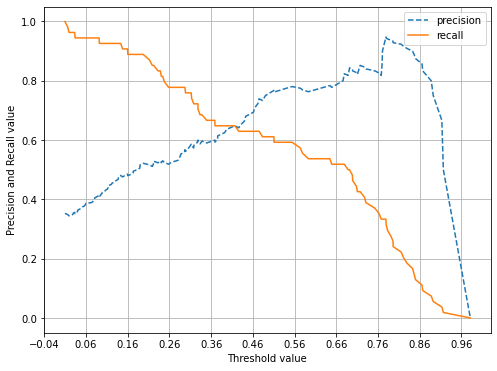

In [42]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)

In [101]:
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
total_count = d_data['Glucose'].count()

for feature in zero_features:
    zero_count = d_data[d_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature,zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [102]:
d_data[zero_features] = d_data[zero_features].replace(0,d_data[zero_features].mean())

In [103]:
X = d_data.iloc[:,:-1]
y = d_data.iloc[:,-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율: 0.6111, F1 : 0.6804, AUC : 0.8433


In [107]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [108]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임곗값 :  0.3
오차행렬
[[67 33]
 [11 43]]
정확도 : 0.7143, 정밀도 : 0.5658, 재현율: 0.7963, F1 : 0.6615, AUC : 0.8433
임곗값 :  0.33
오차행렬
[[72 28]
 [12 42]]
정확도 : 0.7403, 정밀도 : 0.6000, 재현율: 0.7778, F1 : 0.6774, AUC : 0.8433
임곗값 :  0.36
오차행렬
[[76 24]
 [15 39]]
정확도 : 0.7468, 정밀도 : 0.6190, 재현율: 0.7222, F1 : 0.6667, AUC : 0.8433
임곗값 :  0.39
오차행렬
[[78 22]
 [16 38]]
정확도 : 0.7532, 정밀도 : 0.6333, 재현율: 0.7037, F1 : 0.6667, AUC : 0.8433
임곗값 :  0.42
오차행렬
[[84 16]
 [18 36]]
정확도 : 0.7792, 정밀도 : 0.6923, 재현율: 0.6667, F1 : 0.6792, AUC : 0.8433
임곗값 :  0.45
오차행렬
[[85 15]
 [18 36]]
정확도 : 0.7857, 정밀도 : 0.7059, 재현율: 0.6667, F1 : 0.6857, AUC : 0.8433
임곗값 :  0.48
오차행렬
[[88 12]
 [19 35]]
정확도 : 0.7987, 정밀도 : 0.7447, 재현율: 0.6481, F1 : 0.6931, AUC : 0.8433
임곗값 :  0.5
오차행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율: 0.6111, F1 : 0.6804, AUC : 0.8433


In [52]:
binarizer = Binarizer(threshold=0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test,pred_th_048,pred_proba[:,1])

오차행렬
[[88 12]
 [21 33]]
정확도 : 0.7857, 정밀도 : 0.7333, 재현율: 0.6111, F1 : 0.6667, AUC : 0.8059


Q8. "dataset/auto-mpg.xlsx"을 불러와서 회귀 모델을 생성하고 MSE, RMSE, R2로 평가를 수행하세요.

In [109]:
cardf = pd.read_excel('auto-mpg.xlsx')
cdf = cardf[['mpg','cylinders','horsepower','weight']]
cdf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [110]:
cdf.horsepower.replace('?',np.nan,inplace=True)
cdf.dropna(subset=['horsepower'],axis=0,inplace=True)
cdf.horsepower = cdf.horsepower.astype('float')

cdf.to_pickle('auto-mpg.pkl')
cdf = pd.read_pickle('auto-mpg.pkl')
cdf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = cdf[['weight']]
y = cdf['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=11)


lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_preds)

print('MSE : {0:.3f}, RMSE : {1:.3f}, R2 : {2:.3f}'.format(mse,rmse,r2))

MSE : 22.169, RMSE : 4.708, R2 : 0.641


Q9. 'load_boston' 을 불러와서 cross_val_score를 이용한 cv=5인 교차검증을 수행 후 MSE, RMSE를 출력하세요.(LineaRegression) 

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

house = load_boston()
print(house.keys())

house_df = pd.DataFrame(house.data, columns=house.feature_names)
house_df['PRICE'] = house.target

house_df.head()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [117]:
from sklearn.model_selection import cross_val_score

y_target = house_df['PRICE']
X_data = house_df.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ',np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores :',np.round(rmse_scores,2))
print('5 folds의 평균 RMSE : {:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores : [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


Q10. 'Q9에 대하여 R2 Score를 구하세요.(k=5) 

In [118]:
from sklearn.model_selection import KFold

lr = LinearRegression()
cv = KFold(5, shuffle=True, random_state=0)
r2_scores = cross_val_score(lr, X_data, y_target, scoring='r2', cv=cv)
r2_score = np.mean(r2_scores)

print(f'각 fold 별 결정 계수 : {np.round(r2_scores, 3)}')
print(f'평균 결정 계수 : {r2_score:.3f}')

각 fold 별 결정 계수 : [0.589 0.778 0.668 0.668 0.84 ]
평균 결정 계수 : 0.709
